In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.')

In [4]:
print(type(mnist))
print(mnist.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])


In [5]:
mnist_data = mnist.data / 255
mnist_label = mnist.target

print(mnist_data.shape)
print(mnist_label.shape)

(70000, 784)
(70000,)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

label =  3.0


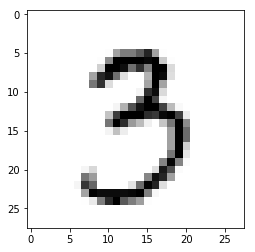

In [8]:
i = 20000
print('label = ', mnist_label[i])
plt.imshow(mnist_data[i].reshape(28,28),cmap='gray_r')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mnist_data, mnist_label, test_size = 0.2)

In [10]:
from keras.utils import np_utils
Y_categorical_train = np_utils.to_categorical(Y_train)
Y_categorical_test = np_utils.to_categorical(Y_test)

In [11]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard

In [12]:
num_length = X_train.shape[1]
num_class = Y_categorical_train.shape[1]
num_hidden = 200
X_input = Input(shape = (num_length, ))
Y_output = Dense(units = num_hidden, activation = 'sigmoid')(X_input)
#Y_output = Dropout(0.5)(Y_output)
Y_output = Dense(units = num_class, activation = 'softmax')(Y_output)

In [13]:
model = Model(inputs = X_input, outputs = Y_output)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

In [14]:
tb_cd = TensorBoard(log_dir = 'tb_log/')

In [15]:
fit = model.fit(X_train, 
                Y_categorical_train, 
                batch_size = 128, 
                epochs = 5, 
                validation_data = (X_test, Y_categorical_test),
                callbacks = [tb_cd])

Train on 56000 samples, validate on 14000 samples
Epoch 1/5
56000/56000 [==============================] - 2s 40us/step - loss: 0.2634 - acc: 0.9194 - val_loss: 0.1425 - val_acc: 0.9565
Epoch 2/5
56000/56000 [==============================] - 2s 37us/step - loss: 0.1094 - acc: 0.9673 - val_loss: 0.1088 - val_acc: 0.9659
Epoch 3/5
56000/56000 [==============================] - 2s 39us/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0867 - val_acc: 0.9728
Epoch 4/5
56000/56000 [==============================] - 2s 39us/step - loss: 0.0495 - acc: 0.9844 - val_loss: 0.0963 - val_acc: 0.9704
Epoch 5/5
56000/56000 [==============================] - 2s 38us/step - loss: 0.0412 - acc: 0.9866 - val_loss: 0.0874 - val_acc: 0.9745


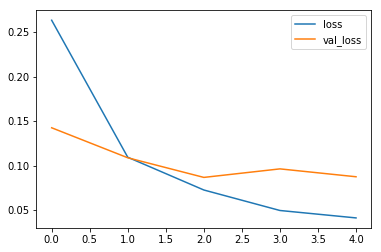

In [16]:
plt.plot(fit.history['loss'], label = 'loss')
plt.plot(fit.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [17]:
predicted = model.predict(X_test)

In [18]:
i_predicted = np.argmax(predicted,axis = 1)

In [19]:
acc = np.mean(i_predicted == Y_test)

In [20]:
acc

0.9745

## CNN

In [21]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Activation, BatchNormalization, Dropout
from keras.initializers import glorot_uniform

In [22]:
X_2d = X_train.reshape(-1, 28, 28)
X_shape = (28, 28, 1)

In [23]:
X_cinput = Input(shape = X_shape)
Y_coutput = Conv2D(filters = 16, kernel_size = (4, 4), strides = (2, 2), kernel_initializer = glorot_uniform(seed = 0), activation = 'relu')(X_cinput)
Y_coutput = BatchNormalization(axis = 3)(Y_coutput)
Y_coutput = Activation('relu')(Y_coutput)
Y_coutput = MaxPooling2D((2, 2), strides = (2, 2))(Y_coutput)
Y_coutput = Dropout(rate = 0.5)(Y_coutput)
Y_coutput = Conv2D(filters = 16, kernel_size = (4, 4), strides = (2, 2), kernel_initializer = glorot_uniform(seed = 0), activation = 'relu')(X_cinput)
Y_coutput = BatchNormalization(axis = 3)(Y_coutput)
Y_coutput = Activation('relu')(Y_coutput)
Y_coutput = Dropout(rate = 0.5)(Y_coutput)
Y_coutput = Flatten()(Y_coutput)
Y_coutput = Dense(units = num_class, activation = 'softmax')(Y_coutput)

In [24]:
model = Model(inputs = X_cinput, outputs = Y_coutput)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

In [25]:
X_train_conv = X_train.reshape(-1, 28, 28, 1)
X_test_conv = X_test.reshape(-1, 28, 28, 1)

In [26]:
X_train_conv.shape

(56000, 28, 28, 1)

In [27]:
fit = model.fit(X_train_conv, Y_categorical_train, batch_size = 128, epochs = 5, validation_data = (X_test_conv, Y_categorical_test))

Train on 56000 samples, validate on 14000 samples
Epoch 1/5
56000/56000 [==============================] - 9s 164us/step - loss: 0.2673 - acc: 0.9215 - val_loss: 0.1149 - val_acc: 0.9653
Epoch 2/5
56000/56000 [==============================] - 8s 149us/step - loss: 0.1507 - acc: 0.9543 - val_loss: 0.0933 - val_acc: 0.9729
Epoch 3/5
56000/56000 [==============================] - 8s 149us/step - loss: 0.1358 - acc: 0.9586 - val_loss: 0.0933 - val_acc: 0.9721
Epoch 4/5
56000/56000 [==============================] - 9s 153us/step - loss: 0.1271 - acc: 0.9598 - val_loss: 0.0882 - val_acc: 0.9724
Epoch 5/5
56000/56000 [==============================] - 9s 153us/step - loss: 0.1209 - acc: 0.9630 - val_loss: 0.0780 - val_acc: 0.9760


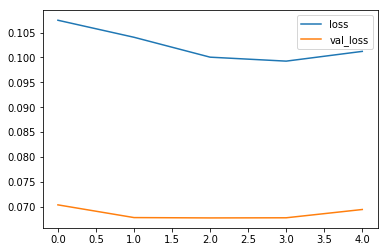

In [152]:
plt.plot(fit.history['loss'], label = 'loss')
plt.plot(fit.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [153]:
cpredicted = model.predict(X_test_conv)

In [154]:
i_cpredicted = np.argmax(cpredicted,axis = 1)

In [155]:
acc = np.mean(i_cpredicted == Y_test)

In [156]:
acc

0.9797857142857143